# **Introduction**

I selected the Ai Developer Productivity dataset because it focuses on factors that influence daily productivity for developers, including coding hours, caffeine intake, distractions, sleep, and the use of ai tools. this dataset is appealing because it combines both continuous numerical variables and a categorical outcome variable (`task_success`), which makes it suitable for exploratory analysis and statistical techniques like hypothesis testing and regression.

The main curiosity driving this project is to understand what influences whether a developer successfully completes their daily task. some of the specific questions I want to answer include:
- does more time spent coding actually lead to higher productivity?
- is higher caffeine intake associated with more commits or fewer bugs?
- do sleep hours or distractions play a significant role in task completion?
- can we predict task success using a combination of developer behavior metrics?

If I imagine myself as a stakeholder, such as a team manager or a productivity consultant, I would want to make decisions about how to improve developer efficiency and well-being. from this data, I would need to know which factors (sleep, caffeine, coding hours, AI usage, etc.) have the strongest relationship with task success, so I could recommend evidence-based practices for better outcomes.


# **Data**

## Data Source
The dataset used in this project is the [ai developer productivity dataset](https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset) hosted on kaggle.

## Data Collection
The dataset is synthetic, generated to simulate daily productivity of developers over a period of about 500 consecutive days. it includes variables related to work habits, caffeine intake, distractions, sleep, and use of ai tools. since it is simulated, results represent associations in the data but not necessarily real-world causal relationships.  

## Cases
Each row in the dataset represents **one day of developer activity**.

## Variables
the dataset contains both numeric and categorical variables:
- `hours_coding` (continuous, hours spent coding)
- `coffee_intake_mg` (continuous, caffeine intake in mg)
- `distractions` (discrete numeric, number of distractions)
- `sleep_hours` (continuous, hours of sleep)
- `commits` (discrete numeric, commits pushed)
- `bugs_reported` (discrete numeric, number of bugs reported)
- `ai_usage_hours` (continuous, hours spent using ai tools)
- `cognitive_load` (ordinal numeric, self-reported scale 1–10)
- `task_success` (categorical, 1 = goal achieved, 0 = goal not achieved)

## Type of study
This is an **observational (simulated) study**, not an experiment. no interventions were performed; data captures simulated daily patterns.


In [3]:
import pandas as pd
df = pd.read_csv("/content/ai_dev_productivity.csv")
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# **Goal (research questions)**

The purpose of this project is to explore what factors influence a developer’s productivity and likelihood of completing their daily task. the dataset contains both continuous and categorical variables, which allows for a range of analyses.

The main research questions are:

1. does spending more hours coding increase the chances of completing the daily task?  
   - categorical vs continuous (task_success ~ hours_coding)  

2. is there a relationship between caffeine intake (`coffee_intake_mg`) and productivity outcomes such as commits made or bugs reported?  
   - continuous vs continuous (coffee_intake_mg ~ commits / bugs_reported)  

3. do sleep hours or distractions significantly impact the probability of task success?  
   - categorical vs continuous (task_success ~ sleep_hours, distractions)  

4. can we build a regression model to predict task success using multiple factors (coding hours, sleep, distractions, ai usage, caffeine)?  
   - logistic regression (binary outcome: task_success)  

5. are there underlying patterns in developer behavior across days that can be summarized using principal component analysis (pca)?

# **Data quality checks**

In this step I will assess data quality by checking:
- missing values and duplicates
- data types and simple range sanity checks
- basic distributions and class balance for `task_success`
- potential outliers in numeric variables

I will also perform cleaning if needed (drop exact duplicates, standardize boolean/categorical formats).

Because this dataset is synthetic, extreme values and outliers may be deliberately included to simulate unusual developer days. these will be noted rather than automatically removed.


In [6]:
import numpy as np
# identify numeric and non-numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]
num_cols, cat_cols

(['hours_coding',
  'coffee_intake_mg',
  'distractions',
  'sleep_hours',
  'commits',
  'bugs_reported',
  'ai_usage_hours',
  'cognitive_load',
  'task_success'],
 [])

Even though "task_success" here is numerical column but it is not continous rather categorical as it is just binary i.e. either 0 or 1 based of if task not completed or completed respectively.

In [7]:
# compute missing values per column
df.isna().sum().sort_values(ascending=False)

,0
hours_coding,0
coffee_intake_mg,0
distractions,0
sleep_hours,0
commits,0
bugs_reported,0
ai_usage_hours,0
cognitive_load,0
task_success,0


In [8]:
# check for fully duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# if duplicates exist, will remove them, nothing here so commented
# df = df.drop_duplicates()
# df.shape

In [9]:
# view numeric summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,5.01560,1.947253,0.0,3.6000,5.03,6.275,12.00
coffee_intake_mg,500.0,463.19200,142.334991,6.0,369.5000,500.50,600.000,600.00
distractions,500.0,2.97600,1.678409,0.0,2.0000,3.00,4.000,8.00
sleep_hours,500.0,6.97580,1.455965,3.0,6.1000,6.95,7.900,10.00
commits,500.0,4.60800,2.704990,0.0,3.0000,5.00,6.000,13.00
bugs_reported,500.0,0.85800,1.102846,0.0,0.0000,0.00,2.000,5.00
ai_usage_hours,500.0,1.51092,1.085557,0.0,0.6975,1.26,2.070,6.36
cognitive_load,500.0,4.49820,1.868861,1.0,3.1750,4.40,5.800,10.00
task_success,500.0,0.60600,0.489124,0.0,0.0000,1.00,1.000,1.00


In [10]:
#range santiy check to idenify outliers which may need to deal with
checks = {
    "hours_coding": (0, 24),
    "sleep_hours": (0, 24),
    "coffee_intake_mg": (0, 5000),
    "ai_usage_hours": (0, 24),
    "distractions": (0, 200),
    "commits": (0, 1000),
    "bugs_reported": (0, 1000),
    "cognitive_load": (1, 10)
}
violations = {}
for col, (lo, hi) in checks.items():
    if col in df.columns:
        bad = df[(df[col] < lo) | (df[col] > hi)]
        if len(bad) > 0:
            violations[col] = bad.shape[0]
violations

{}

In [11]:
# checking unique values and frequency for categorical columns
summary_cats = {}
for c in cat_cols:
    summary_cats[c] = {
        "n_unique": df[c].nunique(dropna=False),
        "top_values": df[c].value_counts(dropna=False).head(10).to_dict()
    }
summary_cats

{}

In [12]:
# ensure task_success is actually binary
if "task_success" in df.columns:
    mapping = {"yes": 1, "no": 0, "true": 1, "false": 0, "y": 1, "n": 0}
    if df["task_success"].dtype == "object":
        df["task_success"] = df["task_success"].str.strip().str.lower().map(mapping).fillna(df["task_success"])
    if df["task_success"].dtype == "bool":
        df["task_success"] = df["task_success"].astype(int)
    if pd.api.types.is_numeric_dtype(df["task_success"]):
        df["task_success"] = df["task_success"].astype(int)

df["task_success"].value_counts(dropna=False, normalize=True) if "task_success" in df.columns else "task_success not found"

,proportion
task_success,
1,0.606
0,0.394


In [13]:
# compute outlier counts per numeric column using iqr rule
outlier_counts = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_counts[c] = 0
        continue
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_counts[c] = int(((df[c] < lower) | (df[c] > upper)).sum())
outlier_counts

{'hours_coding': 3,
 'coffee_intake_mg': 1,
 'distractions': 1,
 'sleep_hours': 5,
 'commits': 10,
 'bugs_reported': 0,
 'ai_usage_hours': 14,
 'cognitive_load': 1,
 'task_success': 0}

In [14]:
# drop exact duplicate rows if any existed
df_clean = df.drop_duplicates().copy()

# strip whitespace in string columns
for c in df_clean.select_dtypes(include=["object"]).columns:
    df_clean[c] = df_clean[c].astype(str).str.strip()

# re-check shape after cleaning
df.shape, df_clean.shape


((500, 9), (500, 9))

# Initial Visualizations

To get an early sense of the dataset, i will generate a few simple plots:

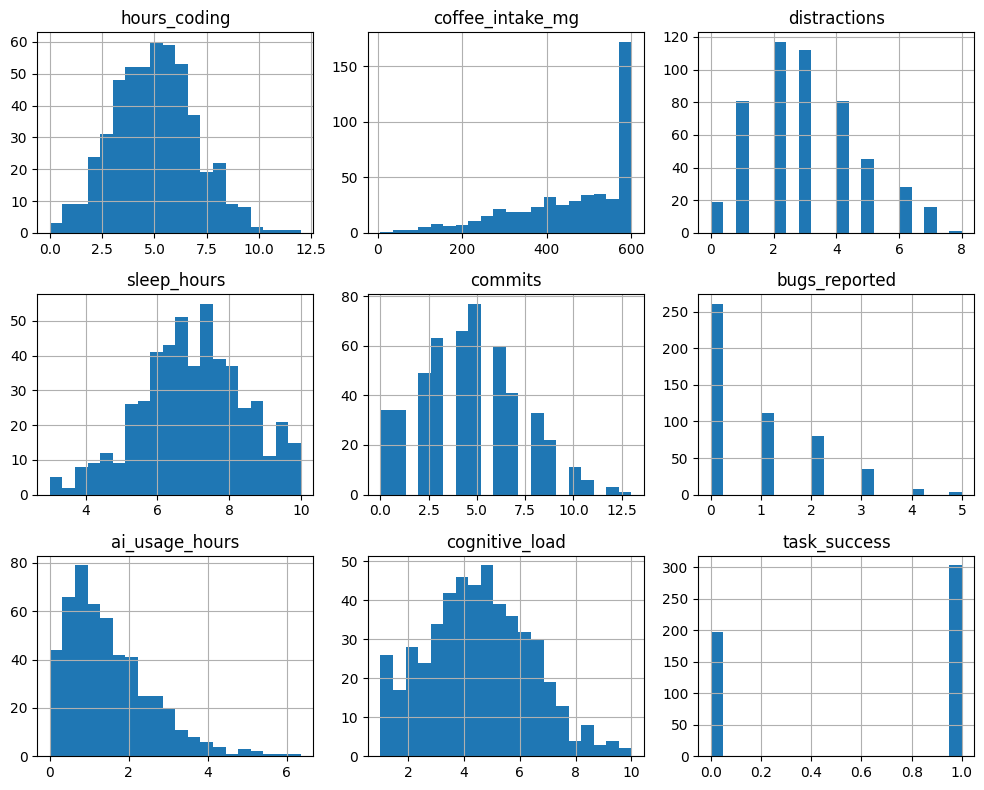

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()


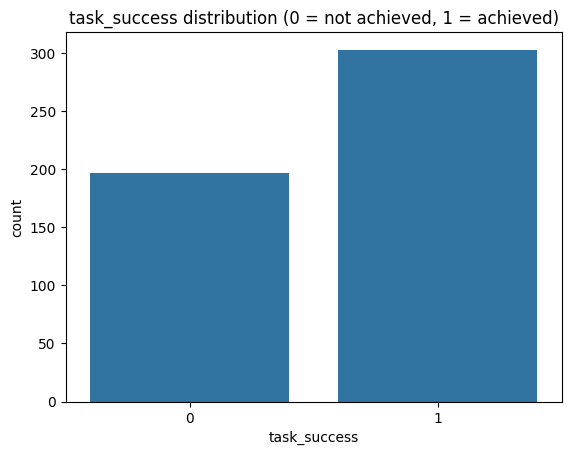

In [21]:
# class balance for task_success
sns.countplot(x="task_success", data=df)
plt.title("task_success distribution (0 = not achieved, 1 = achieved)")
plt.show()


# **Hypothesis testing plan**

For this project, I am interested in testing specific questions about factors that may influence task success (0 = not achieved, 1 = achieved).  

The questions I want to ask include:  
1. do developers who spend more hours coding have a higher likelihood of completing their tasks?  
   - expected result: we may see that average coding hours are higher on successful days.  
   - method: compare mean `hours_coding` between task_success = 0 and task_success = 1 (two-sample t-test or nonparametric test if needed).  

2. does sleep make a difference in whether a task is completed?  
   - expected result: successful days may align with a healthier range of `sleep_hours`, while lack of sleep could lower success rates.  
   - method: compare mean `sleep_hours` across success vs failure days.  

3. do distractions reduce productivity?  
   - expected result: unsuccessful days may have more distractions on average.  
   - method: compare mean `distractions` across groups.  

4. are certain behavioral factors overall associated with task success?  
   - expected result: variables like `ai_usage_hours`, `coffee_intake_mg`, and `cognitive_load` may show positive or negative relationships with task completion.  
   - method: measure statistical association (correlation with the binary task_success variable).  

Overall goal: to identify which personal and work-related factors have a measurable relationship with task success, so that we can highlight practices (like balanced coding hours, sufficient sleep, fewer distractions) that seem linked to better outcomes. this step will build the foundation for deeper analysis using regression later.


# **References**

- kaggle (2024). *ai developer productivity dataset*. available at: https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset  

- wickham, h. & grolemund, g. (2017). *r for data science*. o’reilly media. chapter on exploratory data analysis. available at: https://r4ds.had.co.nz/exploratory-data-analysis.html  

- personal github repository. *ai developer productivity project*. repository maintained to document analysis, code, and findings for this project: https://github.com/uday1o1/ai-developer-productivity-project.git

- openai gpt-5 (2025). used as a learning assistant to clarify methods and concepts.  
  prompts used for self-learning included:  
  - "how can i check for outliers in continuous variables for this dataset?"  
  - "what is the difference between using 0/1 and yes/no for a categorical variable in regression analysis?"  
